In [86]:
from torchvision.models import vgg11
import torchvision
from quantize_utils import *
from utils import *
import cv2


In [87]:
model = vgg11(pretrained=True)

In [88]:
toImage = torchvision.transforms.ToPILImage()
toTensor = torchvision.transforms.ToTensor()
resize = torchvision.transforms.Resize(256)

In [91]:
img= cv2.imread('dog.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
img = cv2.resize(img, ( 383, 256))
# img = toTensor(img)
# img = resize(img)
# img.shape
cv2.imwrite("testoutput.jpg", img)

True

In [17]:
model.eval()
y = model(img.unsqueeze(0))
y.topk(1).indices #253 basenji

tensor([[253]])

In [18]:
img.unsqueeze(0).shape

torch.Size([1, 3, 256, 383])

In [32]:
IR = [img.unsqueeze(0)]
idx = []
with torch.no_grad():
    for i in range(21):
        IR.append(model.features[i](IR[-1]))
        if type(model.features[i]) == torch.nn.Conv2d:
            idx.append(i)
IR = [img.unsqueeze(0)] + [IR[i+1] for i in idx]

In [26]:
idx

[0, 3, 6, 8, 11, 13, 16, 18]

In [33]:
for ir in IR:
    print(ir.shape)

torch.Size([1, 3, 256, 383])
torch.Size([1, 64, 256, 383])
torch.Size([1, 128, 128, 191])
torch.Size([1, 256, 64, 95])
torch.Size([1, 256, 64, 95])
torch.Size([1, 512, 32, 47])
torch.Size([1, 512, 32, 47])
torch.Size([1, 512, 16, 23])
torch.Size([1, 512, 16, 23])


In [49]:
def minMSEimage(ir_images, input):
    value = mse(ir_images[0], input)
    key = ir_images[0]
    for ir_image in ir_images:
        if mse(ir_image, input) < value:
            key = ir_image
            value = mse(ir_image, input)
    return key, value
    

In [50]:
irImages = []
for ir in IR:
    print(ir.shape)
    ir_images = ir2images(ir, (256, 383))
    img, mse_v = minMSEimage(ir_images, IR[0])
    print(mse_v)
    irImages.append(img)

torch.Size([1, 3, 256, 383])
tensor(0.)
torch.Size([1, 64, 256, 383])
tensor(0.0300)
torch.Size([1, 128, 128, 191])
tensor(0.0598)
torch.Size([1, 256, 64, 95])
tensor(0.0811)
torch.Size([1, 256, 64, 95])
tensor(0.1512)
torch.Size([1, 512, 32, 47])
tensor(0.1491)
torch.Size([1, 512, 32, 47])
tensor(0.1598)
torch.Size([1, 512, 16, 23])
tensor(0.1468)
torch.Size([1, 512, 16, 23])
tensor(0.1383)


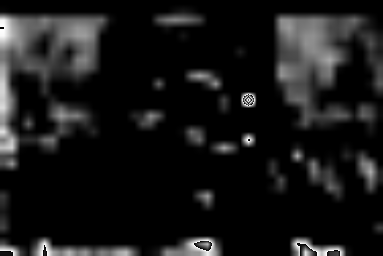

In [81]:
toImage(irImages[5].squeeze())

In [46]:
for ir in IR:
    ir_images = ir2images(ir, (256, 383))
    # print(minMSE(ir_images, IR[0]))
    print()

tensor(0.)
tensor(0.0300)
tensor(0.0598)
tensor(0.0811)
tensor(0.1512)
tensor(0.1491)
tensor(0.1598)
tensor(0.1468)
tensor(0.1383)


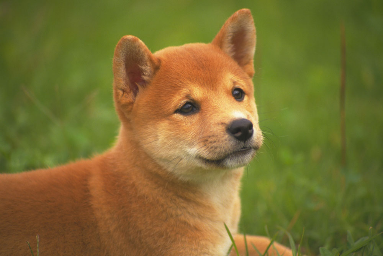

In [44]:
toImage(IR[0].squeeze())